#Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

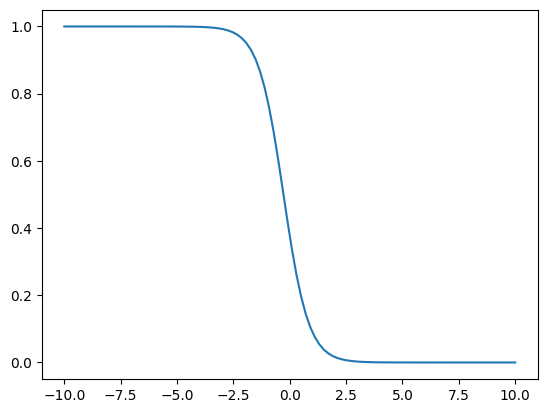

In [4]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [5]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [6]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [7]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [8]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [9]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

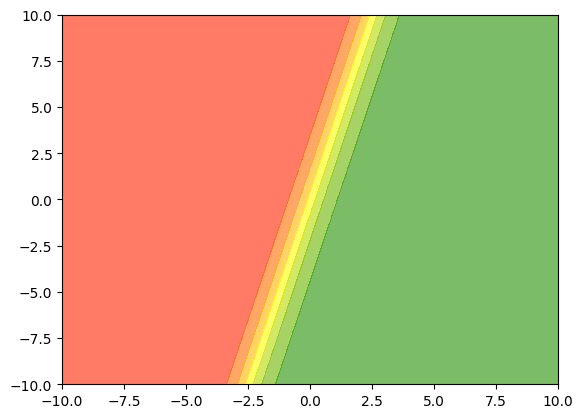

In [10]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

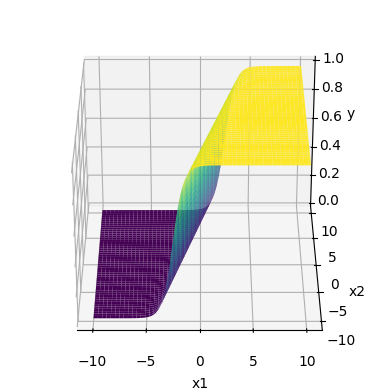

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [12]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

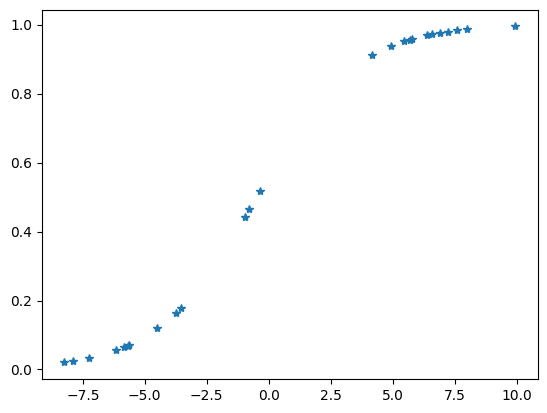

In [13]:
plt.plot(X, Y, '*')
plt.show()

In [14]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [15]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [16]:
WW.shape

(101, 101)

In [17]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

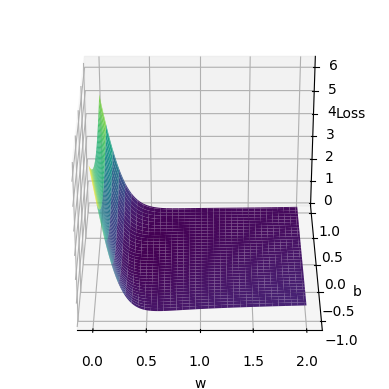

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [19]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [20]:
print(i, j)

62 25


In [21]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [22]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit for toy data

In [23]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [24]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [25]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[-1.34267284  0.01436454]] [0.00205039]


[[-1.16468065 -0.18936327]] [0.02794794]
[[-0.9472362  -0.41244959]] [0.07926303]


/var/folders/f7/m8hfzm0j30l8vf635dzs58lc0000gn/T/ipykernel_13918/1446177394.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  YY[i, j] = sn.sigmoid(sn.perceptron(val))


[[-0.6785842 -0.5239254]] [0.09753924]
[[-0.22278927 -0.59043963]] [0.10212916]
[[ 0.41022488 -0.54548887]] [0.13494323]
[[ 0.74119536 -0.17588188]] [0.13384606]
[[ 0.81405763 -0.3543819 ]] [0.05439646]
[[ 0.95973693 -0.23955036]] [-0.0092679]
[[ 0.99247232 -0.40819028]] [-0.07522767]
[[ 1.10801487 -0.30334855]] [-0.12692452]
[[ 1.13434801 -0.42768273]] [-0.18056431]
[[ 1.21654065 -0.36938296]] [-0.22306496]
[[ 1.24928654 -0.43390277]] [-0.26535959]
[[ 1.30394858 -0.42132274]] [-0.30113078]
[[ 1.34088076 -0.44732598]] [-0.33520326]
[[ 1.38094426 -0.45459772]] [-0.36590262]
[[ 1.41597627 -0.46766642]] [-0.39453207]
[[ 1.4493881  -0.47794137]] [-0.42103274]
[[ 1.48055502 -0.48805324]] [-0.44574665]
[[ 1.50991832 -0.49748111]] [-0.46885111]
[[ 1.53763504 -0.50639431]] [-0.49052333]
[[ 1.5638764  -0.51483254]] [-0.51091098]
[[ 1.58878497 -0.5228429 ]] [-0.53014209]
[[ 1.61248445 -0.53046513]] [-0.54832768]
[[ 1.63508252 -0.53773383]] [-0.5655645]
[[ 1.65667343 -0.54467931]] [-0.58193729]
[

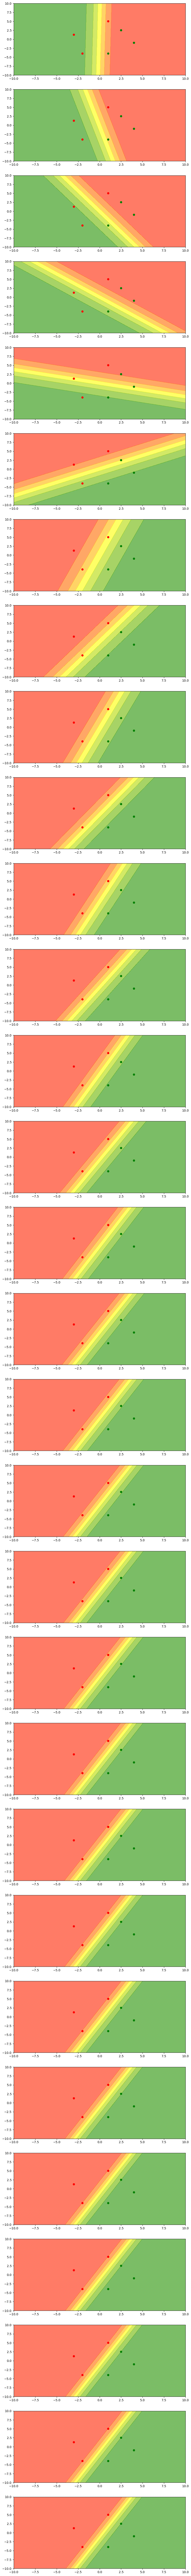

In [26]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

In [27]:
print('hello')

hello
